# Response Themes for "What, if anything, hinders you from making Jupyter Notebook an even more regular part of your workflow?"

* Goal: Extract theme keywords from `hinderances`, `integrations`, `workflow_needs_addressed`, `workflow_needs_not_addressed` responses.
* Data: Output from 2_clean_survey.ipynb notebook (`survey_short_columns.csv`)
* Process from [1_ux_survey_review.ipynb](1_ux_survey_review.ipynb):

> Moving forward, here's a semi-automatic procedure we can follow for identifying themes across questions:
> 1. Take a random sample of question responses
> 2. Write down common theme keywords
> 3. Search back through the responses using the theme keywords
> 4. Expand the set of keywords with other words seen in the search results
> 5. Repeat for all themes and questions
> Later, we can use a fully automated topic modeling approach to validate our manually generated themes.

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np

Make sure the samples come up the same for anyone that re-runs this.

In [3]:
rs = np.random.RandomState(123)

In [4]:
pd.set_option('max_colwidth', 1000)

In [5]:
df = pd.read_csv('survey_short_columns.csv')

In [6]:
def show(series):
    '''Make random samples easier to read.'''
    for i, value in enumerate(series):
        print('{}) {}'.format(i, value), end='\n\n')

In [7]:
hinder = df.hinderances

In [8]:
hinder.isnull().value_counts()

True     943
False    763
Name: hinderances, dtype: int64

In [9]:
hinder = hinder.dropna()

## Initial Samples

I ran the sampling code below 6 times and manually built up the initial set of keywords seen commonly across them. I formed groups of conceptually related keywords. Then I tried to assign a simple label to each group.

In [10]:
show(hinder.sample(20, random_state=rs))

0) Jupyter Notebook "Windows 7+" experience is inferior to Linux one

1) Integration with text editor 

2) Version control (and, which is related, collaborative version control).

3) Doesn't seem to fit with building a large project, prefer IDE

4) remembering how to get it setup

5) better connections to external DBs, easier interact widgets.

6) Primarily use R, Rstudio is better for R.

7) * a "clear and run all" button to get rid of variable persistence (possible with Kernel > Clear all then run but that's more clicks) * a IPython notebook .app -- it'd be really nice to double click on a notebook and have it open

8) School assignments

9) In ML, I have a cell output the loss at each epoch or few thousand iterations. This makes the output really long and to go between cells I have to scroll a lot to get past the wall of text I made.

10) The notebook workflows are very linear, doing experiments is difficult. Also some source control/diff tool would be really nice.

11) - Better edi

In [126]:
themes = {
    'version' : ['version control', 'diff', 'source control', 'git'],
    'ide' : ['text editor', 'ide', 'vim', 'emacs', 'editing', 'key binding', 'key mapping', 'keyboard', 'shortcuts', 'debug', 'programming'],
    'setup' : ['setup', 'desktop', 'install', 'documentation', 'kernels', 'customization'],
    'widgets' : ['widgets', 'view', 'interact', 'dataframes'],
    'connections' : ['connections', 'db'],
    'language': ['rstudio', 'clojure', 'scala', 'c#'],
    'ux' : ['ui', 'design', 'linear', 'search', 'theme', 'collapse', 'organization', 'proliferation', 'cut', 'merge', 'completion', 'aesthetic'],
    'collab' : ['sharing', 'collaboration', 'publication', 'export', 'deploy', 'authoring', 'dashboard', 'cron', 'module', 'reuse', 'latex', 'slides'],
    'robust' : ['stability', 'crash', 'reload', 'bug', 'reliability', 'windows', 'ipad', 'slow', 'performance']
}

## Coverage Improvement

I next ran the code below to associate the theme labels with the responses. I then iterated on running the code below to find reponses without labels. I expanded the list of keywords and themes in order to improve coverage.

In [127]:
import re

In [128]:
def keywords_or(text, keywords):
    for keyword in keywords:
        if re.search('(^|\W+){}'.format(keyword), text, re.IGNORECASE):
            return True
    return False

In [129]:
def tag_themes(responses, themes):
    tagged = hinder.to_frame()
    tagged['themes'] = ''
    for theme, keywords in themes.items():
        results = hinder.map(lambda text: keywords_or(text, keywords))
        tagged.loc[results, 'themes'] += theme + ','
        print(theme, results.sum())
    return tagged

In [130]:
tagged = tag_themes(hinder, themes)
tagged.themes.str.count(',').value_counts()

robust 44
collab 107
ux 70
ide 197
language 22
setup 84
version 139
connections 2
widgets 52


0    302
1    277
2    128
3     40
4     16
Name: themes, dtype: int64

In [131]:
tagged[tagged.themes.str.len() == 0].sample(20, random_state=rs)

,hinderances,themes
980,Nothing. I switch between data projects where I use it and infrastructure projects where I don't.,
1384,"Nothing really, it's already pretty frequent.",
575,It's only for python,
277,"* a ""clear and run all"" button to get rid of variable persistence (possible with Kernel > Clear all then run but that's more clicks) * a IPython notebook .app -- it'd be really nice to double click on a notebook and have it open",
581,Collaborators who insist on using legacy platforms like MATLAB.,
120,I don't use Python often enough,
348,"At times I need to use other work environments (e.g. Atom) when I need other tools, e.g. non-exploratory work.",
729,Not relevant to my day job of working with Drupal and PHP.,
563,"Nothing, I just don't need it more often.",
863,"command line + editor workflow, working with many sources",


In [136]:
themes = {
    'version' : ['version control', 'source control', 'git'],
    'ide' : ['text editor', 'ide', 'vim', 'emacs', 'editing', 'editor', 'key binding', 'key mapping', 'keyboard', 
             'shortcuts', 'debug', 'programming', 'intellisense'],
    'setup' : ['setup', 'desktop', 'install', 'documentation', 'kernels', 'customization', 'turn-key', 'hosted', 
               'server', 'cost', 'access'],
    'widgets' : ['widgets', 'view', 'interact', 'dataframes'],
    'connections' : ['connections', 'db', 'sas', 'd3', 'plot', 'conda', 'pentadactyl', 'spark', 'fenics'],
    'language': ['rstudio', 'clojure', 'scala', 'c#', 'matlab', 'sql', 'perl', 'julia', 'javascript', 'haskell', 
                 'ruby', 'fortran', 'c\+\+', 'sage'],
    'ux' : ['ui', 'design', 'linear', 'search', 'theme', 'collaps', 'organization', 'proliferation', 'cut', 'merge', 
            'completion', 'aesthetic', 'experience', 'interface', 'workspace', 'clutter', 'unwield', 'structure',
            'cumbersome', 'unnatural', 'understand', 'keep track', 'navigate'],
    'collab' : ['sharing', 'collab', 'publication', 'publish', 'export', 'deploy', 'authoring', 'dashboard', 'cron', 
                'module', 'reus', 'latex', 'slides', 'report'],
    'robust' : ['stability', 'crash', 'reload', 'bug', 'reliability', 'windows', 'ipad', 'slow', 'performance', 
                'error', 'speed'],
    'external' : ['legacy', 'acceptance', 'compliance', 'adoption', 'nobody', 'policy', 'inertia'],
    'nothing': ['nothing', 'no need']
}

## Precision Check

I then studied a sample of responses for each theme to see if there major inaccuracies in their application (e.g., string matches that are too fuzzy).

In [137]:
tagged = tag_themes(hinder, themes)
tagged.themes.str.count(',').value_counts()

robust 51
collab 133
ux 130
ide 222
language 59
setup 114
external 11
version 93
nothing 33
connections 27
widgets 52


1    352
0    184
2    141
3     63
4     16
5      4
6      3
Name: themes, dtype: int64

In [134]:
from IPython.display import display, clear_output

In [135]:
for key in themes:
    clear_output()
    display(tagged[tagged.themes.str.contains(key)].sample(10))
    if input('Showing `{}`. Type Enter to continue, "q" to stop.'.format(key)) == 'q':
        break

,hinderances,themes
806,"Not a problem with Jupyter per se, but something to do with the whole ecosystem. The notebook is great for quick hacking and documenting the process, but the visualisation tools are precarious. Matplotlib is designed as a copy of matlab, the output is in image format, and within the notebook, optimised for display. Interactivity with the visualisation is not great, and small tweaks take an inordinate ammount of time. Producing visual outputs for purposes outside of the notebook is also cumbersome.","ux,language,external,widgets,"
1018,"(1) I would like easier-to-use, standardized interactive graphics. (2) I would like my users to be able to go to a web page and run my code, without having to download and install anything.","setup,widgets,"
81,"The one dimensional interface. It seems designed to be a single document rather than an complete interface. If you think about other powerful and ubiquitous software platforms, like Adobe Illustrator or Matlab, they often are designed around panels that expose useful information or interaction. For example, an editor, variable browser, command line, etc. I wish there were also multiple views within the Jupyter Notebook.","ux,ide,language,widgets,"
126,"Lack of a project view, inter-notebook copy/pasting of cells. Not being able to export a Notebook removing code cells but leaving outputs.","collab,widgets,"
919,"* need a black theme (eyes sore from too much light) * need CLI interaction (for commands but maybe curses-like too) * need debugger support (like pudb, ipdb, pdbpp, wdb?) * provide a way to execute some cells asynchronously (sometimes we would like to execute some monitoring code or command prompts or `pip installs`) * interactive input widgets (so we can drive matplotlib-like plots)","ux,ide,setup,connections,widgets,"
229,"Interactive visualisatikn of images, plots etc","connections,widgets,"
314,Interactive debugging is too difficult. Setting breakpoints by clicking line number and then running in debug mode and having a nice way to inspect memory like Pycharm would be filth!,"ide,widgets,"
627,"Nothing, I just don't need interactive development that often.","nothing,widgets,"
1693,Would be great to have more advanced editor features for the cells. Would be great to have an easy way to switch between scripts and interactive sessions (a bit like in RStudio where you can execute parts of a script).,"ide,language,widgets,"
69,I mostly write libraries. Notebooks are not the right artifact for non-interactive computing.,"widgets,"


Showing `widgets`. Type Enter to continue, "q" to stop.


## Topic Model

In [426]:
import gensim
import string
import requests

In [427]:
resp = requests.get('http://www.textfixer.com/resources/common-english-words.txt')

In [428]:
resp.raise_for_status()

In [429]:
stoplist = set(resp.text.split(','))
punct = '"\'#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~' + string.whitespace

In [430]:
texts = hinder.apply(lambda q: [word.strip(punct) for word in q.lower().split() 
                                if word.strip(punct) not in stoplist and len(word.strip(punct))])

In [431]:
all_tokens = pd.Series(texts.sum())

In [432]:
tokens_once = all_tokens.value_counts()[all_tokens.value_counts() == 1]

In [433]:
texts = texts.apply(lambda q: [word for word in q if word not in tokens_once])

In [434]:
dictionary = gensim.corpora.Dictionary(texts)

In [435]:
corpus = texts.apply(lambda q: dictionary.doc2bow(q))

In [436]:
tfidf = gensim.models.TfidfModel(corpus)

In [437]:
corpus_tfidf = tfidf[corpus]

In [438]:
import sklearn.datasets
import sklearn.metrics as metrics
from sklearn.cluster import KMeans
from gensim.matutils import corpus2csc

In [561]:
# set the number of clusters, must be >=1
topics_n = 4
clusters_n = 10
inertia = [np.NaN]

In [562]:
# perform k-means clustering over i=0...k
for k in range(1,clusters_n+1):
    lsi = gensim.models.LsiModel(corpus_tfidf, id2word=dictionary, num_topics=topics_n)
    corpus_lsi = lsi[corpus_tfidf]
    X = corpus2csc(corpus_lsi).transpose()
    k_means = KMeans(n_clusters=k)
    k_means.fit(X)
    print('k = %d, inertia= %f' % (k, k_means.inertia_ ))
    inertia.append(k_means.inertia_)

k = 1, inertia= 36.257972
k = 2, inertia= 22.535551
k = 3, inertia= 16.513271
k = 4, inertia= 12.283841
k = 5, inertia= 10.121559
k = 6, inertia= 8.343615
k = 7, inertia= 7.076387
k = 8, inertia= 6.097018
k = 9, inertia= 5.422745
k = 10, inertia= 4.911326


In [563]:
%matplotlib inline

In [564]:
import matplotlib.pyplot as plt

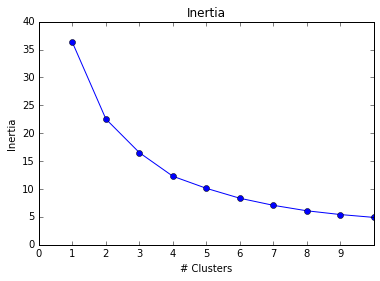

In [565]:
# plot the SSE of the clusters for each value of i
ax = plt.subplot(111)
ax.plot(inertia, '-o')
plt.xticks(range(clusters_n))
plt.title("Inertia")
ax.set_ylabel('Inertia')
ax.set_xlabel('# Clusters')
plt.show()

In [566]:
clusters = pd.Series(k_means.labels_, index=hinder.index)
clusters.value_counts()

8    239
0    182
9     98
2     91
5     61
4     39
6     18
3     14
1     12
7      9
dtype: int64

In [567]:
tagged['cluster'] = clusters

In [572]:
tagged[tagged.cluster == 9]

,hinderances,themes,cluster
11,Browser becomes unresponsive when I start a too intensive computation. Poor integration with my preferred code editors (pycharm or vim).,"ide,",9
23,"IDE capabilities: debugging UI, refactorings,...","ux,ide,",9
27,Hub support for Windows. Better kernel reliability on Windows.,"robust,",9
34,"Lack of proper debugging tools (comparable to e.g. Eclipse IDE, Visual Studio or Matlab).","ide,language,",9
37,"I want Jupyter to act like a normal text editor app in which I can easily open files, without the hassle of starting it from the console in the right place. Simple double click opening for all ipynbs please","ide,",9
52,Code editing is inferior to IDEs,"ide,",9
93,"better connections to external DBs, easier interact widgets.","connections,widgets,",9
123,It doesn't work well with standard version control tools because one line of code doesn't correspond to one line in the notebook file It throws away 30 years of text editor development by replacing a real editor like vim or emacs with a HTML text area.,"ide,version,",9
153,Support for multiple kernels (especially other languages) is super. Getting it to work is still buggy. The Conda distribution is getting better and better.,"robust,setup,connections,",9
173,"- full(er) latex support including cross references for figs, eqns, etc. - a pure text format for version control / diffs and to allow working from text editor (I strongly dislike working in browser) - ability to output to PDF or a nice printable format - something like nbviewer but allowing execution of code (or like jupyterhub but without manual uploading) - better default styling or easier customization - better widget (animations) support","collab,ide,setup,version,",9
